# General

We will be exploring the Border Crossing/Entry dataset from the United States Department of Transportation. This data is maintained by the Bureau of Transporation Statistics that includes data representing inbound crossings at the U.S.-Canada and the U.S.-Mexico border at the port level. 

The data reflects the number of vehicles, containers, passengers or pedestrians entering the United States on a monthly basis. Along with port level information this dataset includes intriguing information around what are referred to as 'measures' that can be classified as 'commercial' and 'personal' border crossings/entry that we will explore further.

The dataset itself consists of 1 table. We will not be utilizing all fields that are provided in the dataset but could be used for future research purposes.

The Border Crossings/Entry file contains a Port Name, State, Port Code,	Border,	Measure, Value, and a Date as a record.

There are only 2 challenges that were encountered (so far) for this dataset. The first challenge is values in the Date field are formatted at datetime values but the dataset is only recording aggregated values at a Year-Month level of granularity. The second is regarding the date we are (currently) running this analysis and how that may skew our dataset. 


**BTS = "Bureau of Transportation Statistics"**

## Quality
As this dataset is being maintained by the federal government we are not as concerned as we would be with other public datasets from across the web. 
### [US Border-Crossing/Entry Data](https://www.bts.gov/content/border-crossingentry-data)

## Asking and Answering 3 Analytical Questions

__#1 How have border crossings trended over the past 2 decades? 

_Note: Keep in mind that this dataset only includes crossings INTO the US not outbound from the US._

In [1]:
import numpy as np
import pandas as pd
import scipy
import statistics as stats
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

In [2]:
# Opening the file and creating a dataframe of it

df = pd.read_csv('Border_Crossing_Entry_Data.csv')

# Converting the original Date column that was type 'string' to type 'Datetime'
df['Date'] = pd.to_datetime(df['Date'])

# Create new columns for Year values from 'Dates' column for use in visualizations
df['Year'] = df['Date'].dt.year

annual_df = df[['Year', 'Value']]
annual_df = df.groupby(['Year'])['Value'].sum().reset_index()

In [3]:
df.head(20)

,Port Name,State,Port Code,Border,Date,Measure,Value,Year
0,Alcan,Alaska,3104,US-Canada Border,2019-06-01,Truck Containers Full,142,2019
1,Alcan,Alaska,3104,US-Canada Border,2019-06-01,Trucks,675,2019
2,Alcan,Alaska,3104,US-Canada Border,2019-06-01,Truck Containers Empty,542,2019
3,Alcan,Alaska,3104,US-Canada Border,2019-06-01,Personal Vehicles,10850,2019
4,Alcan,Alaska,3104,US-Canada Border,2019-06-01,Personal Vehicle Passengers,28016,2019
5,Alcan,Alaska,3104,US-Canada Border,2019-06-01,Pedestrians,32,2019
6,Alcan,Alaska,3104,US-Canada Border,2019-06-01,Buses,47,2019
7,Alcan,Alaska,3104,US-Canada Border,2019-06-01,Bus Passengers,1047,2019
8,Alcan,Alaska,3104,US-Canada Border,2019-05-01,Trucks,774,2019
9,Alcan,Alaska,3104,US-Canada Border,2019-05-01,Truck Containers Full,152,2019


We will be analyzing the past 2 decades of border crossings on an annual basis to get a high level view of any trends we can dive into.

411094543


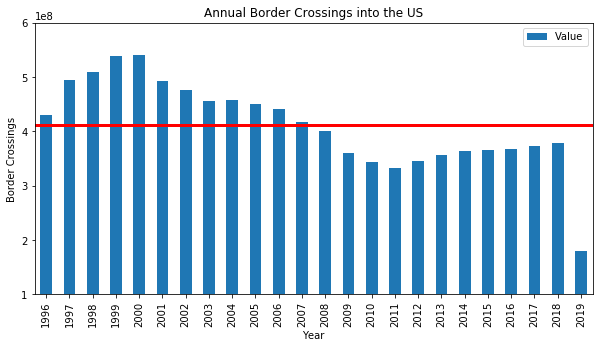

411788531


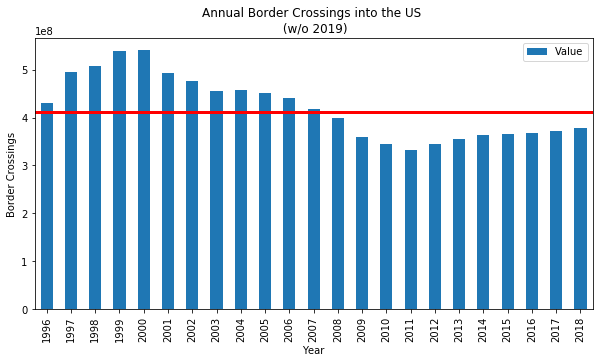

In [4]:
# Calculate Statistics
# Mean
annual_mean = int(np.mean(annual_df['Value']))

print(annual_mean)

annual_df.plot('Year','Value', kind='bar', figsize=(10,5))
hline = plt.axhline(y=annual_mean, linewidth=3, color='r')
plt.title('Annual Border Crossings into the US')
plt.ylabel('Border Crossings')
plt.ylim(100000000, 600000000)
plt.Normalize()
plt.show()

# remove year '2019'
annual_df = annual_df[0:-1]

# Mean w/o '2019'
annual_mean_wo2019 = int(stats.harmonic_mean(annual_df['Value']))

print(annual_mean_wo2019)

annual_df.plot('Year','Value', kind='bar', figsize=(10,5))
hline = plt.axhline(y=annual_mean_wo2019, linewidth=3, color='r')
plt.title('Annual Border Crossings into the US \n (w/o 2019)')
plt.ylabel('Border Crossings')
plt.show()

Just from a visual analysis of annual border crossings we can see that 2019 is an anomaly. That is due to this analysis is being done in September of 2019 and the dataset gets updated at the end of every quarter. This means we only have data up to June of 2019 (only half of the year). For this reason we chose to remove 2019 so as to not skew any of the analysis.

You can also see the change to the average amount of border crossings increases once we remove the incomplete 2019 year. 

_**After the year 2000 there seems to be decline in border crossings into the US. Let's explore this further.**_

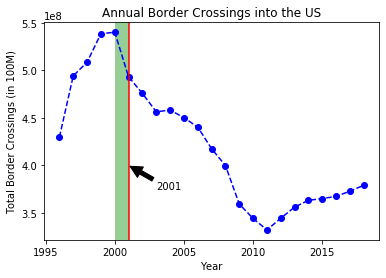

In [5]:
# Visualizing annual border crossings compared to the annual mean
plt.plot(annual_df['Year'], annual_df['Value'], 'bo--')
plt.title('Annual Border Crossings into the US')
plt.xlabel('Year')
plt.ylabel('Total Border Crossings (in 100M)')
plt.axvline(x=2001, color='r')
plt.annotate('2001', xy=(2001, 400000000), xytext=(2003, 375000000),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.axvspan(2000, 2001, facecolor='#2ca02c', alpha=0.5)
plt.show()

It looks like there was an event that triggered a stark decline starting in 2001. Then continued until another event on or around 2012 ocurred that has increased our land border entries into the US since.

_**Note: After doing a bit of research into world and US specific events in 2001 the Septemper 11 terrorist attack on the World Trade Center was something that could have impacted entries into the US.**_

__#2 Has the decline since 2001 impacted commercial border crossings?

The `Measure` variable can be thought of as _Modes of Transportation_ for which we can group our commercial transportation types into.

The BTS classifies a _commercial_ border crossing as either:
- Truck container crossings (loaded and unloaded)
- Rail container crossings (loaded and unloaded)

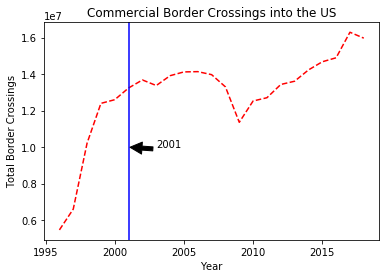

In [6]:
# remove year '2019'
df = df[df['Year']!= 2019]

border_df = df[['Year', 'Measure', 'Value']]
border_df = border_df.groupby(['Year', 'Measure'])['Value'].sum().reset_index()

border_df['Commercial'] = 0
border_df.loc[border_df['Measure'].str.contains('Containers', na=False), 'Commercial'] = 1

commercial_df = border_df[border_df['Commercial']==1]
commercial_df = commercial_df.groupby(['Year','Commercial'])['Value'].sum().reset_index()

cdf_x = commercial_df['Year']
cdf_y = commercial_df['Value']

plt.plot(cdf_x, cdf_y, 'r--')
plt.title('Commercial Border Crossings into the US')
plt.xlabel('Year')
plt.ylabel('Total Border Crossings')
plt.axvline(x=2001, color='b')
plt.annotate('2001', xy=(2001, 10000000), xytext=(2003, 10000000), arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

This looks as though the commercial category of land border crossings were not impacted by the 2001 event we saw have an impact of our overall border crossings into the US by land. So... what did? Well let's take a look at the _personal_ category of border crossings. 

__#3 Has personal travel to the US by Land seen a decline since 2001?

The `Measure` variable can be thought of as _Modes of Transportation_ for which we can group our personal transportation types into.

The BTS classifies a _personal_ border crossing as any of:
- Truck crossings
- Train crossings
- Passengers crossing in trains
- Bus crossings
- Passengers crossing in buses
- Privately owned vehicle crossings
- Passengers crossings in privately owned vehicles
- Pedestrian crossings

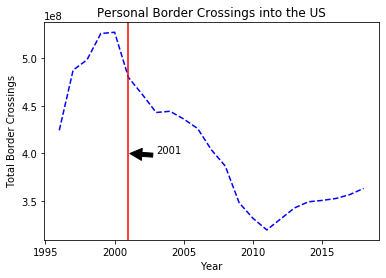

In [7]:
personal_df = border_df[border_df['Commercial']==0]
personal_df = personal_df.groupby(['Year','Commercial'])['Value'].sum().reset_index()

pdf_x = personal_df['Year']
pdf_y = personal_df['Value']
plt.plot(pdf_x, pdf_y, 'b--')
plt.title('Personal Border Crossings into the US')
plt.xlabel('Year')
plt.ylabel('Total Border Crossings')
plt.axvline(x=2001, color='r')
plt.annotate('2001', xy=(2001, 400000000), xytext=(2003, 400000000), arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

So from our analysis we can see that Tourism (defined as 'Personal' modes of Transportation) contributes the majority to the decline in travel to the US from Mexico and Canada. The 'Commercial' industry comprised of Trucks and Railroads entering the US has been gaining momentum which contradicts our general declining trend of Personal travel.

# Future Research and Analysis Improvements

    ○ By including more terrorist attack examples to increase the probability that these fluctuations in the dataset were not due to other variables.
    
    ○ Include Air and Maritime data in the trade analysis would solidify this analysis as this is only one type of entry into the US and the other ones could provide the ability to perform an international analysis (possibly by country into the US)
    
    ○ Adding more years (even back to the 80's) could provide a higher confidence level in calculating our central tendency measures. 
    
    ○ Create an API call to the BTS.gov website could pull data up to todays date for the consumer of the analysis. 